# C11BD Coursework 2 - Superstore

By: Ann Mariya Jomon

HW ID: H00471951

<hr>

## EXECUTIVE SUMMARY

This report analyzes key business metrics to identify the drivers of profitability using multivariate linear regression models and data visualization.  Data cleaning was performed, and outliers were removed using the IQR method to ensure accuracy. The analysis reveals that Office Supplies lead in sales, while Technology generates the highest profit margins across regions. The Consumer segment has the largest customer base, but Furniture underperforms, especially in the Central region. Discounts, particularly those above 20%, significantly reduce profitability, with Furniture being the most affected category.

Two multivariate linear regression models were applied. The first model, focusing on Sales, Quantity, and Discounts, showed that while higher sales improve profitability, excessive discounts erode profits, particularly for low-margin products like Furniture. The second model, incorporating geographical and categorical variables, highlighted the importance of regional performance and product type in determining profitability, with Technology and Copiers consistently driving higher margins.

Recommendations include optimizing discount strategies, prioritizing high-margin products, and refining customer segmentation to focus on the Corporate segment. Attention should also be given to improving Furniture’s performance in the Central region, implementing region-specific strategies, and using advanced techniques for future analysis. Limitations of the analysis include the exclusion of operational costs, customer purchasing behavior, and competitor pricing, which could improve the accuracy of the predictive models. Additionally, the models used explain only a portion of the profit variation, indicating room for further refinement.

<hr>

## 1. Introduction

### Overview

In the modern retail industry, leveraging big data analytics has become essential for businesses to remain competitive, enhance customer experiences, and drive profitability (Lutfi et al., 2023). This report explores sales and profitability trends using the Superstore dataset, a comprehensive dataset containing transaction records of a retail business. By applying data preprocessing, exploratory data analysis (EDA), and machine learning models, we aim to extract meaningful insights that can help businesses optimize operations, improve product performance, and refine pricing strategies. The analysis will cover various aspects of business performance, including sales distribution, profitability drivers, customer segmentation, and regional variations. Additionally, predictive modeling techniques such as linear regression will be used to forecast profit based on key variables like sales, quantity, and discount. The findings of this report will provide actionable recommendations that businesses can leverage to enhance revenue generation, reduce losses, and make data-driven strategic decisions.

### Objective

The objective of this analysis is to uncover patterns and trends that influence profitability and sales performance in a retail environment. Specifically, we aim to identify the key drivers of profit, such as sales volume, product category, and discount levels, and assess their impact on business outcomes. Additionally, we seek to understand regional trends in sales performance, enabling businesses to optimize inventory and marketing strategies. By developing a predictive model, we aim to forecast profitability based on multiple business factors, helping stakeholders make informed, data-driven decisions to maximize efficiency and profitability.

### Data Description

The dataset used in this report is the Superstore dataset, which contains sales transaction records of a retail business. The dataset includes information about products, sales, discounts, profit, customers, and order details. Key attributes in the dataset are:

- row_id: unique row identifier (1-9994)
- order_id: unique order identifier 
- order_date: date the order was placed (03/01/2014 - 30/12/2017)
- ship_date: date the order was shipped (07/01/2014 - 05/01/2018)
- ship_mode: how the order was shipped 
- customer_id: unique customer identifier 
- customer_name: customer name
- customer_name_no:  integer customer name (1-793)
- segment: segment of product
- segment_no: integer segment of product (1-3)
- country: country of customer
- city: city of customer
- state: state of customer
- state_no: integer state of customer (1-49)
- postal_code: postal code of customer
- region: Superstore region represented
- region_no: integer region of customer (1-4)
- product_id: unique product identifier
- category: category of product 
- category_no: integer category of product (1-3)
- sub_category: subcategory of product
- sub_category_no: integer subcategory of product (1-17)
- product_name: name of product
- product_name_no: integer name of product (1-1849)
- sales: total revenue (sales price times quantity) for that sale in USD
- quantity: total units sold for that sale in USD
- discount: fraction discount applied for that sale (0-1)
- returned: TRUE indicates the order was returned
- profit: total profit for that sale in USD

<hr>

## 2. Data Import and Initial Exploration

### 2.1 Importing data

In [1]:
# Importing necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical plots
import warnings  # Handle warnings

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading dataset into a DataFrame 'superstore_df'
superstore_df = pd.read_csv('dataset_Superstore.csv')

# Viewing first 10 rows of dataset
superstore_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Customer_no,Segment,Segment_no,...,Category_no,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned
0,3783,CA-2017-165204,13/11/2017,16/11/2017,Second Class,MN-17935,Michael Nguyen,1,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
1,7322,CA-2017-167626,03/09/2017,07/09/2017,Standard Class,MY-18295,Muhammed Yedwab,2,Corporate,2,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.904,3,0.2,3.3390,False
2,1709,CA-2017-123491,30/10/2017,05/11/2017,Standard Class,JK-15205,Jamie Kunitz,3,Consumer,1,...,2,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,7.420,2,0.0,3.7100,True
3,2586,CA-2015-121041,03/11/2015,10/11/2015,Standard Class,CS-12250,Chris Selesnick,4,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.608,2,0.2,2.1476,False
4,356,CA-2016-138520,08/04/2016,13/04/2016,Standard Class,JL-15505,Jeremy Lonsdale,5,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.260,2,0.0,3.7996,False
5,3742,CA-2016-137848,15/01/2016,21/01/2016,Standard Class,WB-21850,William Brown,6,Consumer,1,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,16.520,4,0.0,7.5992,False
6,7828,CA-2017-117114,31/10/2017,05/11/2017,Standard Class,CY-12745,Craig Yedwab,7,Corporate,2,...,2,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,9.912,3,0.2,3.2214,False
7,3696,CA-2016-142097,15/10/2016,20/10/2016,Standard Class,QJ-19255,Quincy Jones,8,Corporate,2,...,2,Envelopes,2,#10 Self-Seal White Envelopes,2,66.540,6,0.0,32.6046,False
8,4641,CA-2016-102162,11/09/2016,16/09/2016,Standard Class,JF-15565,Jill Fjeld,9,Consumer,1,...,2,Envelopes,2,#10 Self-Seal White Envelopes,2,11.090,1,0.0,5.4341,False
9,3673,CA-2016-104969,08/04/2016,14/04/2016,Standard Class,EH-14125,Eugene Hildebrand,10,Home Office,3,...,2,Envelopes,2,#10 Self-Seal White Envelopes,2,8.872,1,0.2,3.2161,False


### 2.2 Dataset Overview

In [2]:
# Printing number of rows and columns in the dataframe
print("Dataframe shape: ", superstore_df.shape)

Dataframe shape:  (9994, 29)


In [3]:
# Displaying the column names
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Customer_no', 'Segment', 'Segment_no',
       'Country', 'City', 'State', 'State_no', 'Postal Code', 'Region',
       'Region_no', 'Product ID', 'Category', 'Category_no', 'Sub-Category',
       'Sub-Category_no', 'Product Name', 'Product Name_no', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Returned'],
      dtype='object')

In [4]:
# Displaying the number of non-null values and data types of each column
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           9994 non-null   int64  
 1   Order ID         9994 non-null   object 
 2   Order Date       9994 non-null   object 
 3   Ship Date        9994 non-null   object 
 4   Ship Mode        9994 non-null   object 
 5   Customer ID      9994 non-null   object 
 6   Customer Name    9994 non-null   object 
 7   Customer_no      9994 non-null   int64  
 8   Segment          9994 non-null   object 
 9   Segment_no       9994 non-null   int64  
 10  Country          9994 non-null   object 
 11  City             9994 non-null   object 
 12  State            9994 non-null   object 
 13  State_no         9994 non-null   int64  
 14  Postal Code      9994 non-null   int64  
 15  Region           9994 non-null   object 
 16  Region_no        9994 non-null   int64  
 17  Product ID    

In [5]:
# Summary Statistics of numerical columns in dataset
superstore_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Customer_no,9994.0,351.686312,218.420565,1.000,164.00000,338.0000,534.000,793.000
Segment_no,9994.0,1.658995,0.762622,1.000,1.00000,1.0000,2.000,3.000
State_no,9994.0,23.343206,15.504611,1.000,5.00000,28.0000,37.000,49.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Region_no,9994.0,2.587753,1.015616,1.000,2.00000,3.0000,3.000,4.000
Category_no,9994.0,1.972584,0.629544,1.000,2.00000,2.0000,2.000,3.000
Sub-Category_no,9994.0,7.356414,4.544260,1.000,4.00000,7.0000,11.000,17.000
Product Name_no,9994.0,922.312287,531.671404,1.000,474.25000,907.0000,1388.000,1849.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480


<hr>

## 3. Data Cleaning

Data cleaning focuses on preparing the dataset for meaningful analysis by addressing inconsistencies, errors, and missing values that could impact the accuracy of the results. Data cleaning is a crucial step to ensure that the dataset is reliable and ready for analysis. Key tasks include handling missing data, correcting data entry errors, standardizing formats, removing outliers, and removing duplicates. 

### 3.1 Handling Duplicates

In [6]:
# Printing the number of duplicate rows
print("Number of duplicate rows: ",superstore_df.duplicated().sum())

Number of duplicate rows:  0


There are no duplicate rows in this dataset.

### 3.2 Handling Missing Values

In [7]:
# Missing values in each column
superstore_df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Customer_no        0
Segment            0
Segment_no         0
Country            0
City               0
State              0
State_no           0
Postal Code        0
Region             0
Region_no          0
Product ID         0
Category           0
Category_no        0
Sub-Category       0
Sub-Category_no    0
Product Name       0
Product Name_no    0
Sales              0
Quantity           0
Discount           0
Profit             0
Returned           0
dtype: int64

The dataset has no null or missing values.

### 3.3 Dropping columns 

In [8]:
# Number of unique values in each column
superstore_df.nunique()

Row ID             9994
Order ID           5009
Order Date         1237
Ship Date          1334
Ship Mode             4
Customer ID         793
Customer Name       793
Customer_no         793
Segment               3
Segment_no            3
Country               1
City                531
State                49
State_no             49
Postal Code         631
Region                4
Region_no             4
Product ID         1862
Category              3
Category_no           3
Sub-Category         17
Sub-Category_no      17
Product Name       1850
Product Name_no    1849
Sales              5825
Quantity             15
Discount             14
Profit             7287
Returned              2
dtype: int64

The Row ID column contains entirely unique values, making it irrelevant for analysis as it does not provide meaningful insights or patterns in the data. Therefore, it can be removed to optimize the dataset.

Other columns such as 'Postal Code' , 'Order ID', 'Customer Name', 'Country', 'Customer_no', 'Region_no', ' and 'State_no'  are irrelevant as they do not provide meaningful insights for analysis. Removing these columns optimizes the dataset by eliminating redundant and unique identifiers, ensuring only relevant variables are used for analysis.

In [9]:
# Dropping columns that are not relevant to the analysis
superstore_df.drop(columns=[
    'Row ID', 'Postal Code', 'Order ID', 'Customer Name', 'Country',
    'Customer_no','Region_no', 'State_no'], inplace = True )
print(superstore_df.columns)
print("Shape of dataframe: ", superstore_df.shape)

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Segment_no', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Category_no', 'Sub-Category', 'Sub-Category_no', 'Product Name',
       'Product Name_no', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Returned'],
      dtype='object')
Shape of dataframe:  (9994, 21)


### 3.4 Dropping rows with returned orders

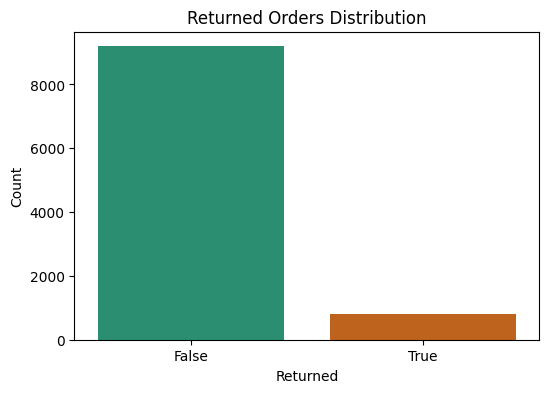

In [10]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create a countplot for the 'Returned' column
sns.countplot(x='Returned', data=superstore_df, palette='Dark2', legend=False)

# Add labels and title
plt.title('Returned Orders Distribution')
plt.xlabel('Returned')
plt.ylabel('Count')
plt.show()

In [11]:
# Number of orders returned and not returned
superstore_df['Returned'].value_counts()

Returned
False    9194
True      800
Name: count, dtype: int64

800 orders were returned and these orders will be removed from the dataset.

In [12]:
# Delete rows where 'Returned' is 'True'
superstore_df = superstore_df[superstore_df['Returned'] != True]

# Print the shape of the DataFrame
print(superstore_df.shape)

(9194, 21)


### 3.5 Rounding Columns

In [13]:
# Rounding values to 2 decimal places
superstore_df[['Sales','Profit']] = superstore_df[['Sales','Profit']].round(2)

### 3.6 Converting date columns to datetime 

In [14]:
# Converting date columns to datetime
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'], dayfirst=True)
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'], dayfirst=True)

### 3.7 Handling Outliers

Outliers are data points that differ significantly from the rest of the dataset, often representing anomalies or rare occurrences. Managing outliers is essential, as they can skew statistical analyses, impact machine learning models, and result in misleading conclusions. In the superstore dataset, the substantial differences between the mean and maximum values in 'Profit', 'Quantity', and 'Sales' suggest the presence of outliers. Identifying and addressing these anomalies is essential to ensure the accuracy and reliability of the analysis (Olteanu, Rossi and Yger, 2023).

In [16]:
# Displaying the descriptive statistics to identify any outliers
superstore_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,9194,2016-04-27 14:57:36.689145088,2014-01-03 00:00:00,2015-05-23 06:00:00,2016-06-24 12:00:00,2017-05-12 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9194,2016-05-01 14:12:58.420709120,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-27 12:00:00,2017-05-15 00:00:00,2018-01-05 00:00:00,NaN
Segment_no,9194.0,1.662932,1.0,1.0,1.0,2.0,3.0,0.765459
Category_no,9194.0,1.971829,1.0,2.0,2.0,2.0,3.0,0.628704
Sub-Category_no,9194.0,7.35273,1.0,4.0,7.0,11.0,17.0,4.541014
Product Name_no,9194.0,918.070916,1.0,471.0,902.0,1382.0,1849.0,531.686756
Sales,9194.0,230.225841,0.44,16.78,54.085,209.7,22638.48,623.57006
Quantity,9194.0,7.048401,1.0,2.0,3.0,5.0,10000.0,180.563348
Discount,9194.0,0.157532,0.0,0.0,0.2,0.2,1.3,0.207779
Profit,9194.0,28.623481,-6599.98,1.67,8.455,29.2475,8399.98,228.173622


A boxplot is a statistical visualization tool used to identify outliers, spread, and distribution of numerical data. It represents key summary statistics, including the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum (Pajankar, 2022). Boxplots are particularly useful in detecting extreme values in variables such as Profit, Quantity, and Sales, where large differences between the mean and maximum values indicate the presence of outliers. By visualizing these distributions, we can assess whether outliers should be removed, transformed, or investigated further for their impact on analysis.

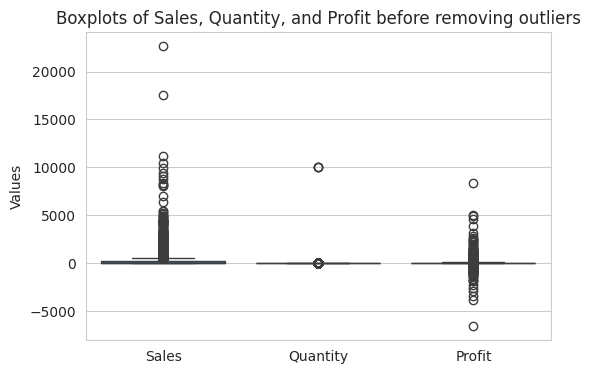

In [17]:
# Set figure size and style
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create multiple boxplots
sns.boxplot(data=superstore_df[['Sales', 'Quantity', 'Profit']])

# Add labels and title
plt.title('Boxplots of Sales, Quantity, and Profit before removing outliers')
plt.ylabel('Values')

# Display the plot
plt.show()

The below code filters outliers from the 'Sales', 'Profit', and 'Quantity' columns in the superstore_df dataset using the IQR method. 

In [18]:
original_rows = len(superstore_df)
print("Original rows: ", original_rows)
# IQR-based outlier removal for Sales, Profit, and Quantity
Q1 = superstore_df[['Sales', 'Profit', 'Quantity']].quantile(0.25)
Q3 = superstore_df[['Sales', 'Profit', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
superstore_df = superstore_df[~((superstore_df[['Sales', 'Profit', 'Quantity']] < lower_bound) | 
                              (superstore_df[['Sales', 'Profit', 'Quantity']] > upper_bound)).any(axis=1)]

print("After IQR filtering: ", len(superstore_df))
print("Number of outliers detected: ", original_rows - len(superstore_df))

Original rows:  9194
After IQR filtering:  7156
Number of outliers detected:  2038


The Interquartile Range (IQR) method is a statistical technique used to detect outliers in a dataset.  It is particularly useful for skewed data or datasets that aren’t normally distributed. It is based on the quartiles of the data, which divide the data into four equal parts. It first calculates the first (Q1) and third (Q3) quartiles of these columns and then computes the IQR as the difference between Q3 and Q1. Using the IQR, it defines lower and upper bounds (1.5 times the IQR below Q1 and above Q3) to detect outliers (Evans, 2021). Rows with values outside these bounds are filtered out. The output shows that the original dataset had 9194 rows, and after removing the outliers, 7156 rows remain, meaning 2038 rows were identified as outliers and removed from the dataset.

The IQR method was selected for outlier removal because it is robust to skewed data distributions, unlike the Z-score, which assumes normality.However, a limitation of IQR is that it may remove legitimate extreme values, potentially discarding important business trends.

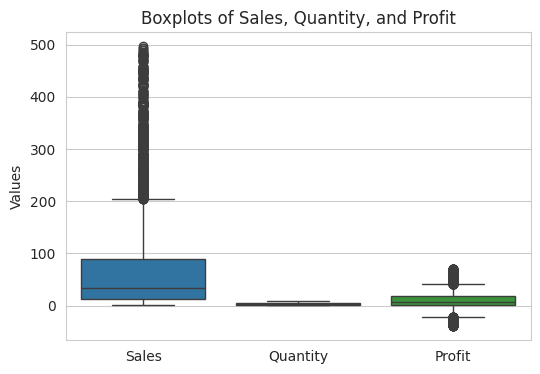

In [19]:
# Set figure size and style
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Create multiple boxplots
sns.boxplot(data=superstore_df[['Sales', 'Quantity', 'Profit']])

# Add labels and title
plt.title('Boxplots of Sales, Quantity, and Profit')
plt.ylabel('Values')

# Display the plot
plt.show()

In [20]:
# Displaying the updated DataFrame
superstore_df

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Segment_no,City,State,Region,Product ID,...,Sub-Category,Sub-Category_no,Product Name,Product Name_no,Sales,Quantity,Discount,Profit,Returned,Shipping Duration
0,2017-11-13,2017-11-16,Second Class,MN-17935,Consumer,1,Memphis,Tennessee,South,OFF-PA-10003424,...,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.90,3,0.2,3.34,False,3
1,2017-09-03,2017-09-07,Standard Class,MY-18295,Corporate,2,Chicago,Illinois,Central,OFF-PA-10003424,...,Paper,1,"""While you Were Out"" Message Book, One Form pe...",1,8.90,3,0.2,3.34,False,4
3,2015-11-03,2015-11-10,Standard Class,CS-12250,Corporate,2,Haltom City,Texas,Central,OFF-EN-10001137,...,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,6.61,2,0.2,2.15,False,7
4,2016-04-08,2016-04-13,Standard Class,JL-15505,Consumer,1,New York City,New York,East,OFF-EN-10001137,...,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,8.26,2,0.0,3.80,False,5
5,2016-01-15,2016-01-21,Standard Class,WB-21850,Consumer,1,New York City,New York,East,OFF-EN-10001137,...,Envelopes,2,"#10 Gummed Flap White Envelopes, 100/Box",1,16.52,4,0.0,7.60,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2017-01-07,2017-01-13,Standard Class,TS-21085,Consumer,1,Ormond Beach,Florida,South,OFF-BI-10000145,...,Binders,7,Zipper Ring Binder Pockets,1849,2.81,3,0.7,-1.97,False,6
9990,2016-11-26,2016-11-29,First Class,PA-19060,Home Office,3,Miami,Florida,South,OFF-BI-10000145,...,Binders,7,Zipper Ring Binder Pockets,1849,3.74,4,0.7,-2.62,False,3
9991,2015-10-09,2015-10-13,Standard Class,SC-20575,Consumer,1,Miami,Florida,South,OFF-BI-10000145,...,Binders,7,Zipper Ring Binder Pockets,1849,1.87,2,0.7,-1.31,False,4
9992,2017-07-28,2017-08-01,Standard Class,MH-17620,Corporate,2,San Francisco,California,West,OFF-BI-10000145,...,Binders,7,Zipper Ring Binder Pockets,1849,9.98,4,0.2,3.62,False,4


<hr>

## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing a dataset to better understand its structure, patterns, relationships, and potential anomalies. It is an essential first step in data analysis that helps uncover insights before formal modeling or hypothesis testing. The goal of EDA is to make the data more understandable and to guide decisions about the appropriate methods for further analysis (Páez and Boisjoly, 2023). EDA helps to refine hypotheses, spot errors or inconsistencies in data, and determine the appropriate statistical methods or machine learning models to apply later in the analysis process. It is an iterative process that can involve revisiting earlier steps based on insights gained during the analysis.

### 4.1 Summary Statistics

Summary Statistics displays key metrics like mean, median, standard deviation, and percentiles to understand the central tendency, spread, and distribution of the data.

In [21]:
# Summary Statistics of the updated dataset 
superstore_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Order Date,7156,2016-04-30 13:57:43.163778304,2014-01-03 00:00:00,2015-05-29 00:00:00,2016-06-30 12:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,7156,2016-05-04 13:28:56.612633088,2014-01-07 00:00:00,2015-06-02 00:00:00,2016-07-02 00:00:00,2017-05-17 00:00:00,2018-01-05 00:00:00,NaN
Segment_no,7156.0,1.658608,1.0,1.0,1.0,2.0,3.0,0.765155
Category_no,7156.0,1.977362,1.0,2.0,2.0,2.0,3.0,0.572895
Sub-Category_no,7156.0,6.713667,1.0,4.0,6.0,9.0,17.0,4.250906
Product Name_no,7156.0,921.968139,1.0,449.5,930.0,1428.5,1849.0,553.406598
Sales,7156.0,69.901543,0.44,13.09,32.92,89.7025,496.86,89.712588
Quantity,7156.0,3.416154,1.0,2.0,3.0,5.0,9.0,1.884161
Discount,7156.0,0.148946,0.0,0.0,0.2,0.2,1.2,0.200294
Profit,7156.0,11.012982,-39.64,2.02,6.91,17.74,70.55,17.839427


In [22]:
# Getting median values of numerical columns
median_values = superstore_df.select_dtypes(include='number').median()

print(median_values)

Segment_no             1.00
Category_no            2.00
Sub-Category_no        6.00
Product Name_no      930.00
Sales                 32.92
Quantity               3.00
Discount               0.20
Profit                 6.91
Shipping Duration      4.00
dtype: float64


### 4.2 Data Visualizations

Data Visualization in Exploratory Data Analysis (EDA) plays a crucial role in understanding the underlying structure and patterns within a dataset. By creating graphical representations such as histograms, box plots, scatter plots, and bar plots, it becomes easier to detect trends, distributions, and potential relationships between variables (Navlani, Fandango and Idris, 2021).

Bar Graph of Product Categories

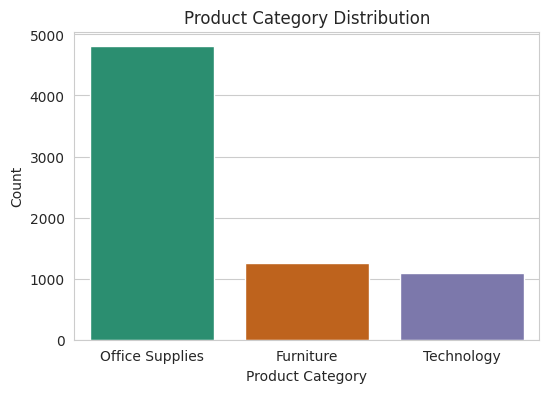

In [23]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create a countplot for the 'Category' column
sns.countplot(x='Category', data=superstore_df, palette='Dark2', legend=False)

# Add labels and title
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

The bar chart visually represents the count of products within three categories: Office Supplies, Furniture, and Technology.  The chart clearly demonstrates that Office Supplies is the dominant category, with a count nearing 5,000, significantly outnumbering both Furniture and Technology, which have counts below 1,500.  The bars are arranged in descending order, highlighting the relative popularity or abundance of products in each category, with Office Supplies being the most prevalent, followed by Furniture, and then Technology.  This distribution suggests a potential focus or strength in the Office Supplies category, while Furniture and Technology represent smaller segments of the product offerings.

In [24]:
# Count of each category
superstore_df['Category'].value_counts()

Category
Office Supplies    4804
Furniture          1257
Technology         1095
Name: count, dtype: int64

Bar Graph of Customer Segment

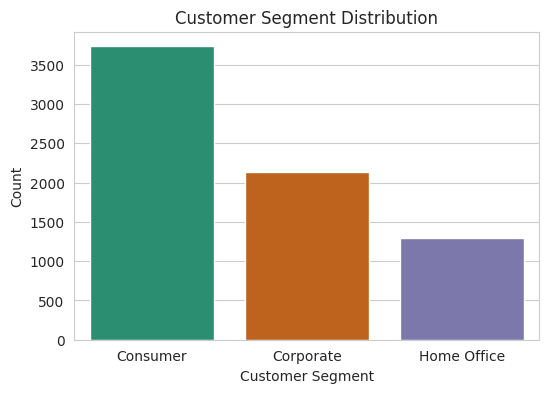

In [25]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create a countplot for the 'Segment' column
sns.countplot(x='Segment', data=superstore_df, palette='Dark2', legend=False)

# Add labels and title
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

This bar chart illustrates the number of customers within three distinct segments: Consumer, Corporate, and Home Office.  The chart clearly shows that the Consumer segment is the most prevalent, with a customer count significantly exceeding 3,500, dwarfing both the Corporate and Home Office segments, which have counts below 2,200 and 1,300 respectively.  The bars are arranged in descending order, highlighting the relative size of each customer segment, with Consumer representing the largest portion of the customer base, followed by Corporate, and then Home Office.  This distribution suggests a strong focus or market penetration within the Consumer segment, while the Corporate and Home Office segments represent smaller, but potentially valuable, customer groups.  

In [26]:
# Count of each customer segment
superstore_df['Segment'].value_counts()

Segment
Consumer       3733
Corporate      2133
Home Office    1290
Name: count, dtype: int64

Bar Graph depicting Profit Margin  by Product Category and Customer Segments

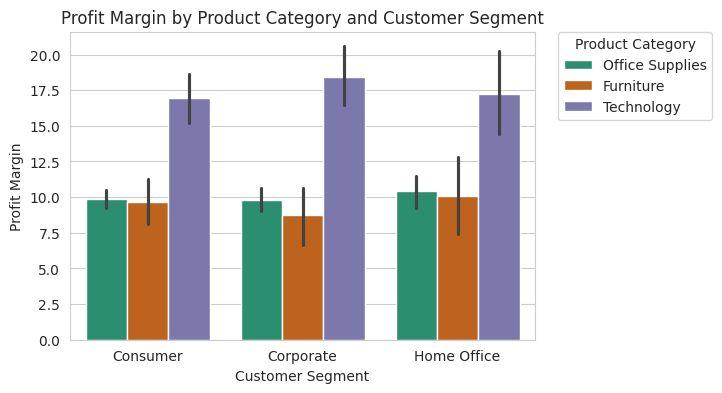

In [27]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create a bar plot of Profit by Category, grouped by Customer Segment
sns.barplot(x='Segment', y='Profit', hue='Category', data=superstore_df, palette='Dark2')

# Add labels and title
plt.title('Profit Margin by Product Category and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit Margin')

# Show legend
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show plot
plt.show()

This grouped bar chart depicts profit margins across three customer segments—Consumer, Corporate, and Home Office—and three product categories: Office Supplies, Furniture, and Technology.  Technology consistently demonstrates the highest profit margins across all segments, with a notable peak in the Corporate segment, suggesting strong corporate demand or premium pricing for technology products.  Office Supplies and Furniture exhibit significantly lower and relatively consistent profit margins across all segments, indicating potential price competition or lower perceived value.  The error bars represent variability in profit margins, highlighting potential fluctuations or inconsistencies within each category and segment combination, which could stem from factors like sales volume, pricing strategies, or operational costs.  The Corporate segment shows a more pronounced difference between Technology and the other categories, suggesting a strong preference or willingness to pay for technology, while the Consumer and Home Office segments display similar profit margin patterns, with Technology leading, followed by Office Supplies and then Furniture.

Bar Graph depicting Profit Margin distribution across Regions

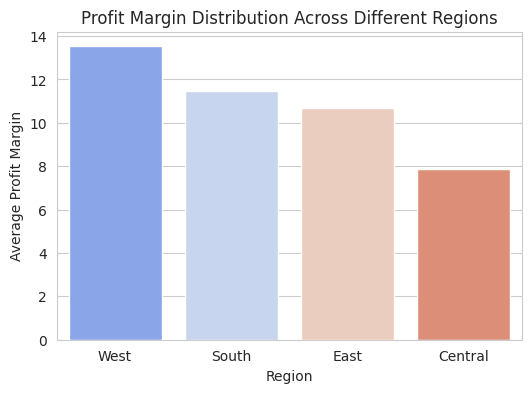

In [28]:
# Aggregate total profit per region and sort in descending order
region_avg_profit = superstore_df.groupby('Region')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False)

# Set figure size
plt.figure(figsize=(6, 4))

# Create bar plot
sns.barplot(x='Region', y='Profit', data=region_avg_profit, palette='coolwarm')

# Add labels and title
plt.title('Profit Margin Distribution Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Average Profit Margin')

plt.show()

This bar chart presents the average profit margin across four regions: West, South, East, and Central. The chart clearly indicates that the West region boasts the highest average profit margin, exceeding 13, while the South region follows with a noticeably lower margin, just above 11. The East region exhibits a further decrease, with a margin slightly above 10, and the Central region demonstrates the lowest average profit margin, falling below 8. This distribution suggests a significant variation in profitability across the regions, with the West demonstrating the strongest performance and the Central region lagging behind, potentially requiring further investigation into its operational or market-related challenges.

Bar Graph depicting Profit Margin across States

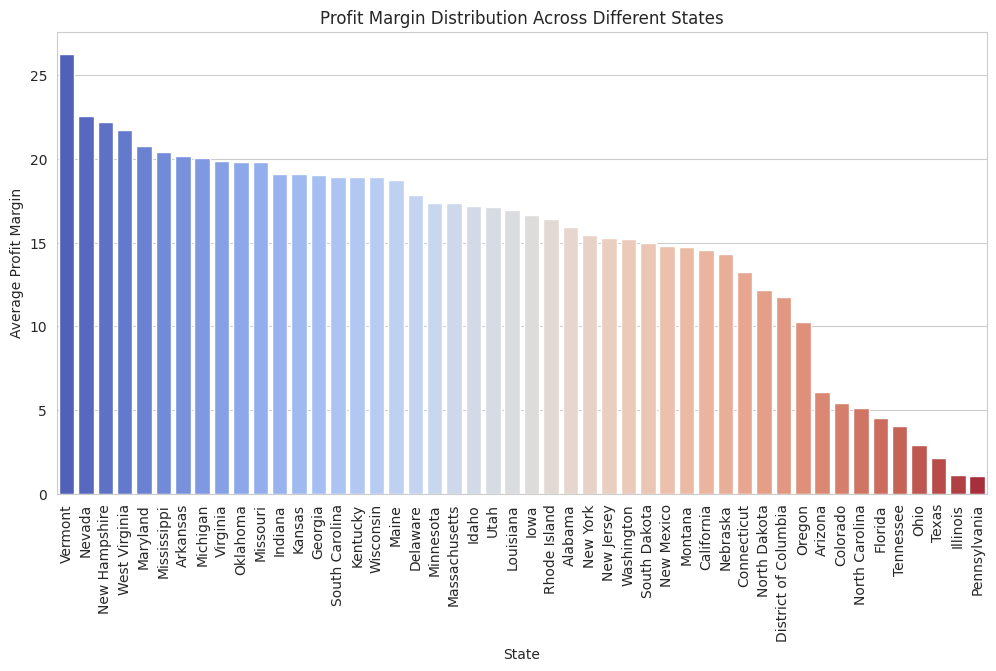

In [29]:
# Average the profit per state and sort in descending order
state_avg_profit = superstore_df.groupby('State')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x='State', y='Profit', data=state_avg_profit, palette='coolwarm')

# Add labels and title
plt.title('Profit Margin Distribution Across Different States')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()

The bar chart displays the average profit margin for each U.S. state arranged in descending order from highest to lowest.  Vermont exhibits the highest average profit margin, exceeding 25, followed by Nevada and New Hampshire, which form the top three. The chart reveals a gradual decline in profit margins across the state.  This indicates significant variation in profitability across the country, likely due to factors such as industry mix, cost of living, and local business environments.  The bottom two states, with the lowest average profit margins, are Illinois and Pennsylvania, both falling below 2.  This chart is crucial for understanding the company's profitability by highlighting regional disparities in performance.  It allows businesses to identify high-performing states that may warrant further investment or expansion, as well as low-performing states that require strategic adjustments, such as cost reduction, pricing revisions, or market repositioning.  By pinpointing areas of strength and weakness, companies can optimize resource allocation, tailor marketing strategies, and ultimately improve overall profitability.

Bar Graph depicting top 10 Profitable Cities

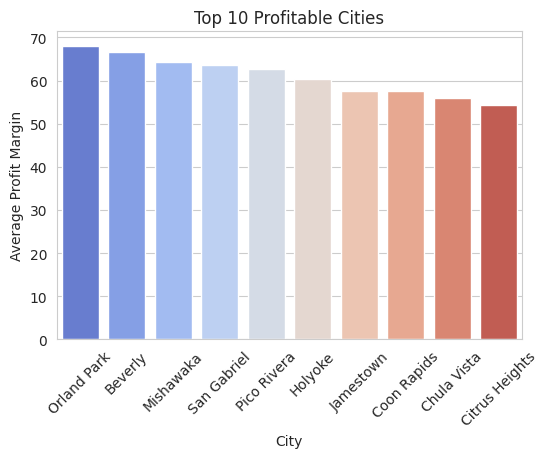

In [30]:
# Average profit per city and sort in descending order showing top 10
city_avg_profit = superstore_df.groupby('City')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(6, 4))

# Create bar plot
sns.barplot(x='City', y='Profit', data=city_avg_profit, palette='coolwarm')

# Add labels and title
plt.title('Top 10 Profitable Cities')
plt.xlabel('City')
plt.ylabel('Average Profit Margin')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

The bar chart displays the average profit margin for the ten most profitable cities, arranged in descending order from Orland Park, which exhibits the highest average profit, to Citrus Heights, which shows the lowest among the top ten. The chart reveals a gradual decline in average profit margin across the cities.  This distribution suggests variations in market conditions, operational efficiency, or customer demographics across these cities. This chart is instrumental in improving profitability by allowing businesses to pinpoint high-performing locations that may serve as models for best practices or expansion opportunities.  Conversely, it allows for the identification of cities with lower profitability within the top ten, prompting investigations into potential challenges or areas for improvement, such as cost management, marketing strategies, or customer engagement, to optimize performance and replicate the success observed in the leading cities.

Bar Graph depicting Profit Margin distribution across Product Subcategories

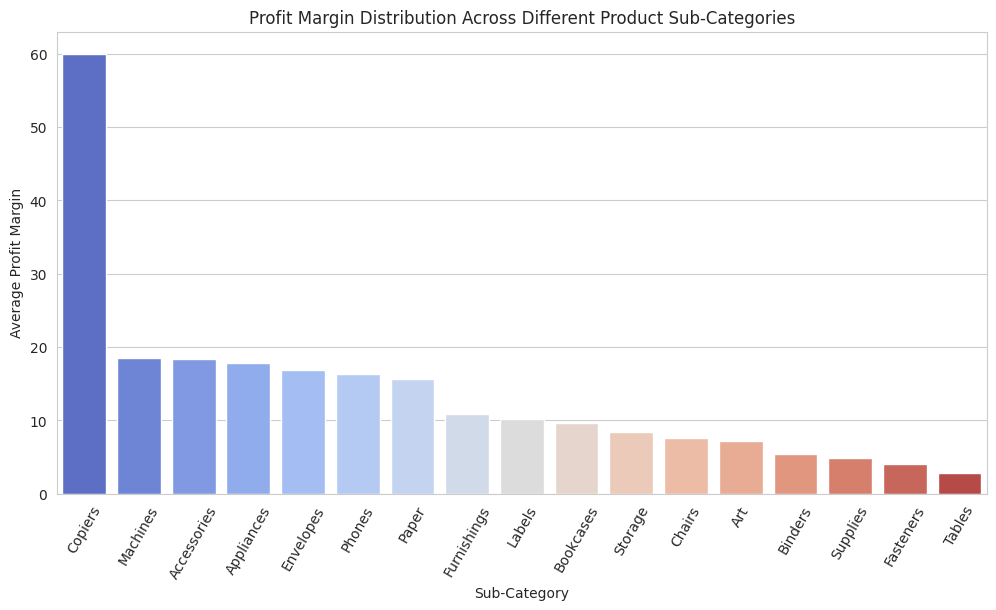

In [31]:
# Aggregate average profit per sub-category and sort in descending order
subcategory_avg_profit = superstore_df.groupby('Sub-Category')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_avg_profit, palette='coolwarm')

# Add labels and title
plt.title('Profit Margin Distribution Across Different Product Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Average Profit Margin')

# Rotate x-axis labels for readability
plt.xticks(rotation=60)

plt.show()

This bar chart displays the average profit margin for various product sub-categories, arranged in descending order from Copiers, which exhibits the highest average profit margin, to Tables, which shows the lowest.  Copiers stand out with a significantly higher average profit than all other sub-categories, suggesting a highly lucrative product line.  The chart reveals a steep decline in average profit margin from Copiers to Machines, followed by a more gradual decrease across the remaining sub-categories.  This distribution suggests significant variation in profitability across different product lines, likely due to factors such as production costs, pricing strategies, and market demand.  This chart is crucial for improving profitability by allowing businesses to identify high-profit sub-categories, such as Copiers, that may warrant increased investment or marketing focus.  Conversely, it allows for the identification of low-profit sub-categories, like Tables, prompting investigations into potential challenges or areas for improvement, such as cost reduction, pricing revisions, or product repositioning, to optimize performance and replicate the success observed in high-performing product lines.

Line Plot depicting Discount vs Profit across different Product Categories

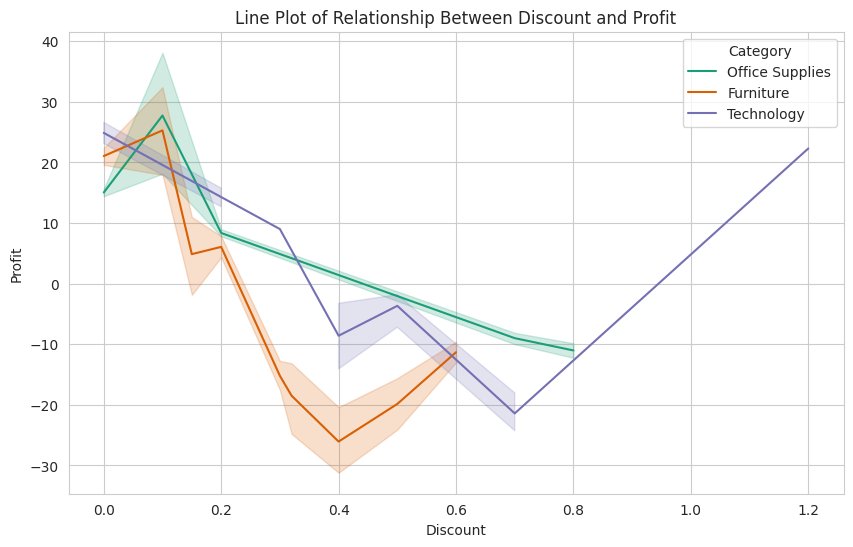

In [33]:
# Set the figure size for the plot (10 inches by 6 inches)
plt.figure(figsize=(10, 6))

# Create a line plot using seaborn to visualize the relationship between 'Discount' and 'Profit'
# The 'hue' parameter is used to differentiate the lines by 'Category' with a color palette 'Dark2'
sns.lineplot(x='Discount', y='Profit', hue='Category', data=superstore_df, palette='Dark2')

# Add labels and title
plt.title('Line Plot of Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Display the plot
plt.show()

This line plot illustrates the impact of increasing discounts on profit across three product categories: Office Supplies, Furniture, and Technology.  Generally, as discounts increase, profit tends to decrease for all categories, with Furniture showing the most dramatic negative correlation, dipping sharply into negative profit territory as discounts exceed 0.2.  Office Supplies and Technology exhibit a more gradual decline, though Technology shows a surprising profit surge as discounts approach 1.2, suggesting potential strategic discounting at very high levels.  The shaded areas around the lines represent confidence intervals, indicating the variability or uncertainty in the profit data at each discount level.  This chart is crucial for understanding how discounting strategies impact profitability across different product categories, allowing businesses to identify optimal discount ranges for each category to maximize profit. For example, it suggests that deep discounts on Furniture should be avoided, while strategic high discounts on Technology might be explored. By analyzing these trends, businesses can refine pricing strategies, optimize promotional offers, and ultimately improve overall profitability.

Profit vs Sales Scatter Plot

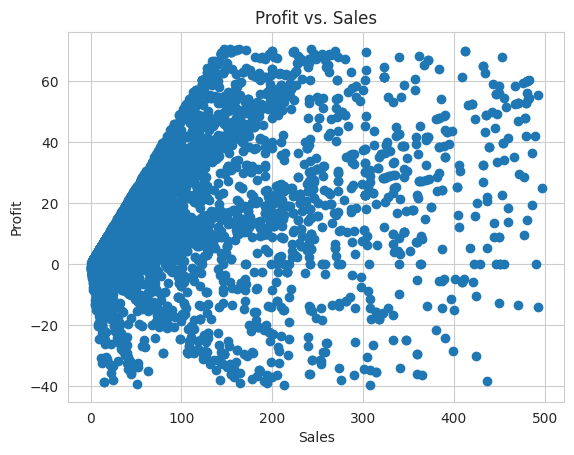

In [34]:
# Create a scatter plot to visualize the relationship between 'Sales' and 'Profit' 
plt.scatter(superstore_df['Sales'], superstore_df['Profit'])

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Profit vs. Sales')

# Display the plot
plt.show()

This scatter plot depicts the relationship between sales and profit, revealing a general trend of increasing profit with higher sales, though with significant variability.  At lower sales volumes (below 100), profit is highly dispersed, ranging from substantial losses to moderate gains, indicating that low sales do not guarantee profitability.  As sales increase, the spread of profit values widens initially, showing that higher sales can lead to both higher profits and potentially larger losses, suggesting other factors are influencing profitability.  Beyond sales of approximately 200, the data points tend to cluster more tightly towards higher profit values, indicating a stronger correlation between increased sales and improved profitability in this range. This chart helps in understanding profitability by visualizing the impact of sales volume on profit, allowing businesses to identify the sales thresholds necessary for achieving positive returns and to recognize the potential risks and opportunities associated with different sales levels. 

Profit vs Quantity Scatter Plot

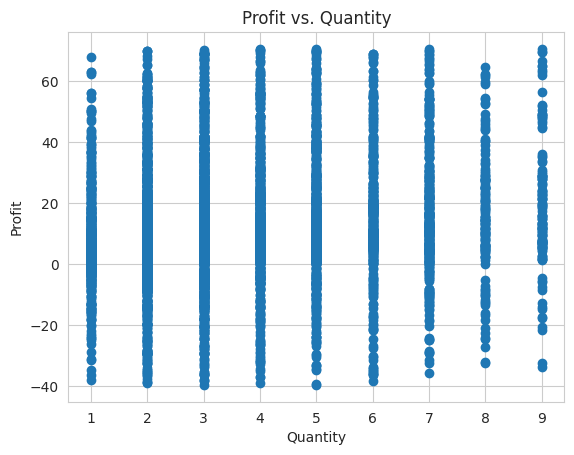

In [35]:
# Create a scatter plot to visualize the relationship between 'Quantity' and 'Profit' 
plt.scatter(superstore_df['Quantity'], superstore_df['Profit'])

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.title('Profit vs. Quantity')

# Display the plot
plt.show()

This scatter plot displays the relationship between the quantity of items sold and the resulting profit, revealing a distinct pattern of vertical columns at each quantity value, indicating that profit varies significantly even when the quantity sold is constant.  This suggests that quantity alone is not a strong predictor of profit, as other factors, such as pricing, product type, or operational costs, are likely playing a significant role.  The wide dispersion of profit points at each quantity level, ranging from substantial losses to significant gains, highlights the inconsistency in profitability even when selling the same number of items. This chart helps in understanding profitability by demonstrating that focusing solely on quantity sold may not lead to improved profits.  It prompts businesses to investigate other factors influencing profitability, such as pricing strategies, product mix, and cost control, allowing for a more nuanced approach to optimizing performance beyond simply increasing sales volume.

Profit vs Discount Scatter Plot

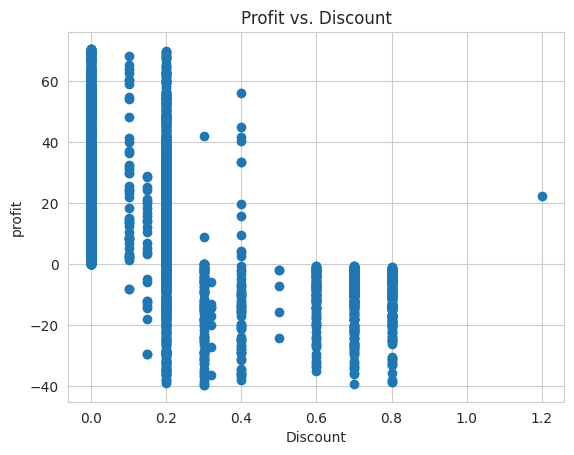

In [36]:
# Create a scatter plot to visualize the relationship between 'Discount' and 'Profit' 
plt.scatter(superstore_df['Discount'], superstore_df['Profit'])

# Add labels and title
plt.xlabel('Discount')
plt.ylabel('profit')
plt.title('Profit vs. Discount')

# Display the plot
plt.show()

This scatter plot illustrates the relationship between the discount offered and the resulting profit, revealing a pattern where profits are generally high at low discount levels (0.0 to 0.2) but exhibit significant variability, ranging from substantial gains to moderate losses.  As the discount increases beyond 0.2, profits sharply decline and cluster predominantly in the negative range, indicating that higher discounts consistently lead to losses.  The data points form distinct vertical columns at specific discount values, suggesting that the discount is a controlled variable, and profit varies significantly even at the same discount level due to other influencing factors. This chart illustrates the negative impact of high discounts on profitability, helping businesses identify the critical threshold to optimize pricing and promotional strategies for better sales and profit balance.

Correlation Matrix - Sales, Quantity, Profit, Discount

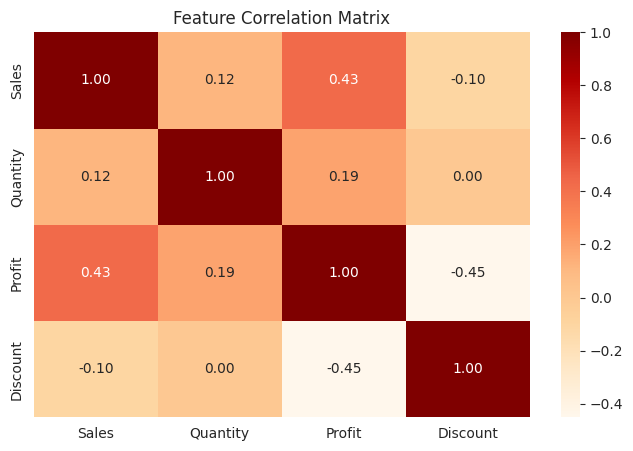

In [39]:
# Set the figure size for the heatmap 
plt.figure(figsize=(8, 5))

# Create a heatmap to visualize the correlation matrix for 'Sales', 'Quantity', 'Profit', and 'Discount'
# The 'annot=True' argument adds correlation coefficient values to each cell in the heatmap
# 'fmt=".2f"' formats the correlation values to two decimal places
sns.heatmap(superstore_df[['Sales', 'Quantity', 'Profit', 'Discount']].corr(), annot=True, cmap="OrRd", fmt=".2f")

# Set the title of the heatmap
plt.title("Feature Correlation Matrix")

# Display the heatmap
plt.show()

This heatmap displays the pairwise correlations between four variables: Sales, Quantity, Profit, and Discount, with the color intensity representing the strength and direction of the correlation. Understanding these relationships is crucial for identifying factors that impact profitability and making data-driven business decisions.

One notable observation from the heatmap is the moderate positive correlation (0.43) between Sales and Profit. This suggests that, in general, higher sales lead to increased profits, though not always proportionally. Similarly, there is a weak positive correlation (0.19) between Quantity and Profit, indicating that selling more units does not necessarily result in significantly higher profits. This could be due to factors such as bulk discounts or varying profit margins across different products.

A critical insight is the moderate negative correlation (-0.45) between Discount and Profit. This suggests that offering higher discounts tends to reduce profitability, likely because the reduction in selling price outweighs the potential increase in sales volume. Interestingly, the correlation between Discount and Sales is very weak (-0.10), implying that higher discounts do not strongly influence overall sales volume. Additionally, the correlation between Quantity and Discount is nearly zero (0.00), meaning that an increase in the number of units sold is not necessarily linked to offering discounts.

This heatmap helps optimize business strategies by revealing that higher discounts reduce profitability, suggesting companies should carefully adjust discounts to attract customers without eroding margins. While sales growth can boost profits, the moderate correlation between Sales and Profit indicates that focusing on high-margin products and cost efficiency is more effective. Additionally, the weak correlation between Quantity and Profit highlights the need for a profitability-driven approach rather than assuming higher sales always lead to higher earnings.

<hr>

## 5. Modelling Strategy - Multivariate Regression

Multivariate regression is an extension of linear regression that examines how multiple independent variables influence a single dependent variable. (Evans, 2021). Unlike simple linear regression, which assesses the impact of just one predictor at a time, multivariate regression allows us to examine how several factors collectively influence an outcome. This makes it particularly useful in business analytics, where profitability is affected by multiple variables.

In this scenario, multivariate regression can help identify key factors driving profitability by analyzing the relationships between Sales, Quantity, Discount, and other business variables. By incorporating multiple predictors, we can quantify how each factor contributes to profit while controlling for the effects of others. For example, if Discount has a strong negative coefficient while Sales has a positive one, it suggests that increasing discounts may erode profitability despite higher sales volume. Similarly, if Quantity has a weak or insignificant effect, it may indicate that selling in bulk does not necessarily increase profit margins.

On the other hand, linear regression is a simpler model that examines the relationship between one independent variable and the dependent variable (James et al., 2023). While it helps in identifying basic trends, it does not capture the complexity of interactions among multiple factors affecting profitability. For instance, Sales and Discount might have a combined effect on Profit that cannot be captured using a single-variable model.

By applying multivariate regression, businesses can make data-driven decisions, optimizing pricing strategies, adjusting discount policies, and targeting customer segments that drive higher profitability. This method provides a more comprehensive understanding of business performance and enables better strategic planning.

### 5.1 Importing libraries

In [38]:
# Import train_test_split from sklearn.model_selection to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression from sklearn.linear_model to perform linear regression
from sklearn.linear_model import LinearRegression

# Import mean_squared_error and r2_score from sklearn.metrics to evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Used to apply transformations to specific columns
from sklearn.compose import ColumnTransformer  

# Used to encode categorical variables
from sklearn.preprocessing import OneHotEncoder  


### 5.2 Quantifiable Factors

The following code applies a multivariate linear regression model to predict profit based on three key variables: Sales, Quantity, and Discount. The process begins by selecting these variables, where Sales and Quantity represent revenue and transaction volume, while Discount influences profit margins by lowering the selling price. The dependent variable, Profit, is analyzed in relation to these predictors to understand their impact on business performance.


To train and test the model, the dataset is divided using train_test_split from sklearn.model_selection, allocating 80% for training and 20% for testing. This approach ensures the model learns from a subset of data while being evaluated on unseen data, minimizing overfitting. The regression model, implemented using LinearRegression from sklearn.linear_model, identifies the best-fitting line that minimizes errors between predicted and actual profits. The training process involves fitting the model to the dataset with model.fit(X_train, y_train), allowing it to learn the relationships between the independent variables and profit.


Predictions are generated using model.predict(X_test), and the model's accuracy is assessed using the R² score and mean squared error (MSE) from sklearn.metrics. The R² score measures how well the model explains profit variability, with higher values indicating better performance, while MSE evaluates prediction accuracy by calculating the average squared difference between actual and predicted profits. Additionally, the model outputs coefficients and intercept values, offering insights into the impact of Sales, Quantity, and Discount on profitability, helping businesses refine pricing and discount strategies.


5.2.1 Data Preparation

In [39]:
# Define Independent (X) and Dependent (Y) Variables
X = superstore_df[['Sales', 'Quantity', 'Discount']]  # Independent variables
y = superstore_df['Profit']  # Dependent variable

5.2.2 Splitting data into Training and Testing sets

In [40]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.2.3 Training the model

In [41]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get Model Coefficients and Intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Shows impact of Sales, Quantity, and Discount on Profit

Intercept: 7.221907898396448
Coefficients: [  0.07181605   1.2287777  -37.54564531]


5.2.4 Evaluating Model Performance

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R²):", r2)  # Measures how well the independent variables explain Profit


Mean Squared Error (MSE): 213.42478861034212
R-Squared (R²): 0.4057737070151628


5.2.5 Visualizing Predictions

The scatter plot helps to visually assess how well the model's predictions align with the actual values. By plotting the actual profit values against the predicted ones, it allows us to quickly see if the model is making accurate predictions. 

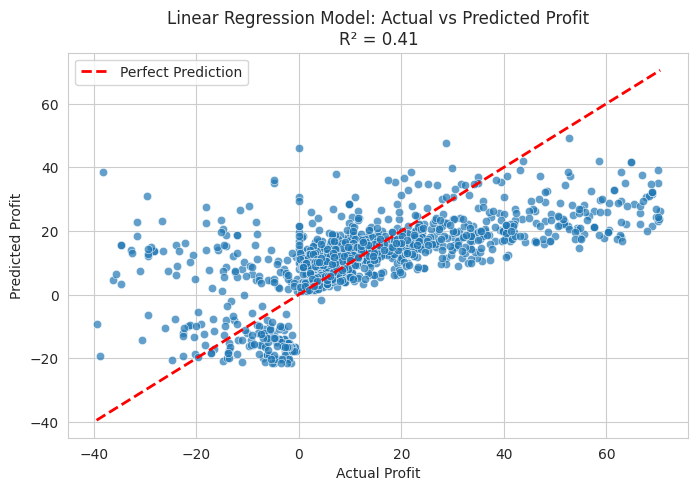

In [43]:
# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)  # Scatter points

# Add 45-degree reference line (Perfect Prediction Line)
max_val = max(max(y_test), max(y_pred))  # Find max value for axis limit
min_val = min(min(y_test), min(y_pred))  # Find min value
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

# Labels and Title
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression Model: Actual vs Predicted Profit\nR² = {}'.format(round(r2, 2)))
plt.legend()

# Show plot
plt.show()


This scatter plot visualizes the relationship between actual and predicted profit values from a linear regression model. With an R-squared value of 0.41, the model accounts for 41% of the variance in actual profit, indicating a moderate fit. The dispersion of points around the ideal prediction line suggests some inaccuracies, with larger deviations representing higher prediction errors. The pattern of points reveals that the model tends to underestimate profit at higher values and overestimate it at lower values, particularly in the negative profit range. While the model captures some key trends, it may not fully incorporate all factors affecting profitability.

5.2.6 Interpreting Results

Intercept: 7.2219: This represents the intercept in the linear regression equation, indicating the predicted profit when Sales, Quantity, and Discount are all zero. It acts as the baseline profit estimate in the absence of any independent variable influence.

Coefficients: [ 0.0718, 1.2288, -37.5456]: These values represent the weights assigned to the independent variables (Sales, Quantity, and Discount). Each coefficient indicates how much the profit is expected to change with a one-unit change in the corresponding independent variable, while holding the others constant:

- For Sales, an increase of 1 unit leads to an increase in profit of 0.0718 units.

- For Quantity, an increase of 1 unit leads to an increase in profit of 1.2288 units.

- For Discount, an increase of 1 unit leads to a decrease in profit of 37.5456 units (since the coefficient is negative, indicating that higher discounts reduce profit).

Mean Squared Error (MSE): 213.42: This metric quantifies the average squared deviation between predicted and actual profit values. A lower MSE signifies a more accurate model. In this case, an MSE of 213.42 indicates some prediction errors, suggesting potential areas for model improvement.

R-Squared (R²): 0.406: The R² value indicates the percentage of variance in profit that is accounted for by the independent variables (Sales, Quantity, and Discount). An R² of 0.406 suggests that the model explains about 40.6% of the profit variation, demonstrating some predictive ability. However, with 59.4% of the variation remaining unexplained, the model may be missing other key factors influencing profit.

The regression model provides valuable insights into the factors influencing profitability, with sales and quantity positively contributing to profit, while discounts have a significant negative impact. However, the R² value of 0.406 suggests that the model explains only 40.6% of the profit variation, indicating that other influential factors remain unaccounted for. Additionally, the MSE of 213.42 highlights a level of prediction error, emphasizing the need for model refinement. Enhancements could include integrating more variables, examining non-linear relationships, or leveraging advanced machine learning methods to improve prediction accuracy and refine pricing strategies.

### 5.3 Geographical and Sales Demand Variables

This code applies a multivariate linear regression model to predict profit based on multiple features, including both numerical and categorical variables. It first selects relevant columns from the dataset and applies One-Hot Encoding to the categorical variables ('State,' 'Sub-Category,' and 'Segment') using ColumnTransformer. The processed data is then divided into training (80%) and testing (20%) sets. A linear regression model is trained on the training data, and its coefficients and intercept are displayed. Model performance is assessed using Mean Squared Error (MSE) and R-Squared (R²) score, followed by a scatter plot comparing actual and predicted profits, with a 45-degree reference line for visual evaluation.

5.3.1 Data Preparation

In [44]:
# Select independent variables (features) and the dependent variable (target)
X = superstore_df[['Sales', 'State', 'Sub-Category', 'Segment', 'Quantity']]  # Features
y = superstore_df['Profit']  # Target variable (Profit)

# ColumnTransformer to apply One-Hot Encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('State', OneHotEncoder(handle_unknown='ignore'), ['State']),  # One-Hot Encode 'State'
        ('SubCat', OneHotEncoder(handle_unknown='ignore'), ['Sub-Category']),  # One-Hot Encode 'Sub-Category'
        ('Seg', OneHotEncoder(handle_unknown='ignore'), ['Segment'])  # One-Hot Encode 'Segment'
    ], 
    remainder='passthrough'  # Keep all numerical columns unchanged
)

# Applying One-Hot Encoding transformation to X
X = preprocessor.fit_transform(X)

# Convert transformed X to a DataFrame (Improves interpretability)
X = pd.DataFrame(X.toarray()) if hasattr(X, "toarray") else pd.DataFrame(X)

5.3.2 Splitting data into Training and Testing sets

In [45]:
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.3.3 Training the model

In [46]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get Model Coefficients and Intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.881562555302617
Coefficients: [ -2.88524804  -8.74892207   4.32098618  -0.35249382 -10.52044133
   2.11224844   2.56730073   0.03772408 -10.52118594   2.93769857
  -0.20829988 -11.42872269   2.49760802   3.93254811   0.58967101
   5.36005642   3.38531753   4.35983201   7.24213811   3.55299299
   4.24970124   2.22299052   5.09485602   2.42003913   0.14365463
   1.59976959   3.72356937   1.42730123   2.62751937   1.06783033
   1.63768925  -8.35618094   4.89539369 -10.94390333   8.30488964
  -7.98903846 -12.02596409   1.82411233   2.52764669   4.008055
  -9.65451212 -11.35143352   2.44282411   3.20543237   5.25001977
   0.52183678  -2.13272521   5.02781819   7.64404443   7.63521592
   3.31332646   2.32156366 -19.11016263 -16.85575809   2.04297399
  12.64510186   3.02359974   4.50922777   6.53439522   2.21440104
  11.70268301   0.82326605  -4.35147975   0.30945819 -24.40185687
  -0.06866834   0.03025638   0.03841196   0.11584845   0.61414636]


5.3.4 Evaluating Model Performance

In [47]:
# Predict on the Test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-Squared Score

# Print model evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-Squared Score (R²):", r2)

Mean Squared Error (MSE): 179.43833150811898
R-Squared Score (R²): 0.5004002335167972


5.3.5 Visualizing Predictions

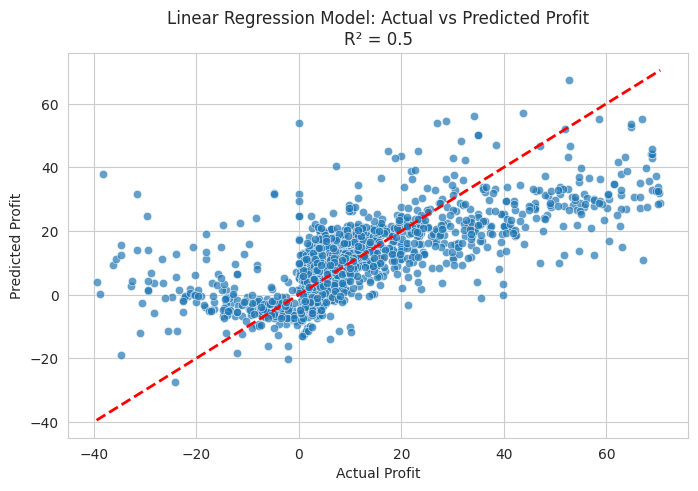

In [48]:
# Scatter Plot: Actual vs Predicted Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression Model: Actual vs Predicted Profit\nR² = {}'.format(round(r2, 2)))
plt.show()

This scatter plot evaluates the linear regression model's ability to predict profit. With an R-squared value of 0.5, the model explains 50% of the variance in actual profit, indicating a moderate fit but leaving room for improvement. While many points align along the perfect prediction line, significant deviations suggest prediction errors, especially for extreme profit values. The model struggles to accurately predict very high and very low profits, as these points are farther from the ideal line. Although the clustering along the diagonal shows that some patterns are captured, the spread indicates that additional factors influencing profit are not accounted for.

5.3.6 Interpreting Results

Intercept: 0.8816: This is the baseline value for the predicted profit when all the independent variables are set to zero.

Coefficients: These values represent the impact of each feature on the target variable (profit). Each coefficient corresponds to one of the encoded features after the One-Hot Encoding process. A negative coefficient (e.g., -2.8852 for 'Sales') suggests that an increase in the corresponding feature will result in a decrease in profit, while a positive coefficient (e.g., 4.3209 for 'Quantity') indicates that an increase in the feature will lead to an increase in profit.

Mean Squared Error (MSE): 179.44: This metric shows the average squared difference between the predicted and actual profit values. A lower MSE indicates a better fit, but this value suggests there is some level of error in the predictions, indicating room for improvement.

R-Squared (R²): 0.5004: The R² value means that approximately 50.04% of the variance in the profit can be explained by the model. While this indicates some predictive power, half of the variation is not captured by the model, suggesting that other factors may also influence profit.

Overall, the model provides moderate predictive power, explaining 50.04% of the variance in profit, but still leaves room for improvement. While sales and quantity positively impact profit, the strong negative coefficient for discounts confirms its detrimental effect on profitability. The MSE of 179.44 indicates some level of prediction error, suggesting that additional factors, such as market trends, operational costs, or customer behavior, could enhance the model’s accuracy. Future refinements should focus on incorporating more predictive variables and exploring non-linear relationships to improve profit forecasting and decision-making. 

<hr>

## 6. Conclusion and Key Findings

This report analyzes key business metrics to understand the factors influencing profitability using statistical techniques and data visualization. By examining sales, profit margins, customer segments, product categories, and discount impacts, the analysis provides valuable insights into business performance. Multivariate regression was applied to quantify relationships between key variables, helping to identify trends and patterns. These findings will aid in making data-driven decisions, optimizing pricing strategies, and improving overall profitability. The following section presents detailed conclusions, recommendations, and future actions based on the analysis.

### Key Insights from the EDA:

- Sales & Profitability: Office Supplies drive the highest sales, but Technology yields the highest profit across segments and regions.

- Customer Segments: The Consumer segment dominates in customer count, followed by Corporate and Home Office.

- Regional Performance: Technology is the most profitable category in all regions, while Furniture struggles, especially in the Central region.

- State & City Profitability: Vermont has the highest average profit margin, and Orlando Park is the most profitable city.

- Product Categories: Copiers generate the highest profit, while Tables show the lowest profit margins.

- Discount Impact: Higher discounts lead to declining profitability, with Furniture being the most negatively affected.

- Sales vs. Profit: Low sales volumes show dispersed profit trends, while higher sales tend to improve profitability.

- Quantity & Profit: Selling more units does not always lead to higher profits due to factors like bulk discounts.

- Correlation Insights: Sales moderately correlate with profit, while discounts show a strong negative correlation with profitability.

### Key Insights from Regression Models:

Model 1: The first model applies multivariate linear regression to predict profit based on Sales, Quantity, and Discount. The model confirms that Sales positively impact profit, but the correlation is moderate, meaning higher sales alone do not guarantee higher profitability. Quantity has a weaker impact on profit, indicating that selling in bulk does not necessarily lead to increased earnings. The most significant finding is the strong negative impact of discounts on profit, reinforcing that excessive discounting erodes profitability. The model’s R² value of 0.406 suggests that 40.6% of profit variation is explained by these three factors, leaving room for additional variables to improve prediction accuracy. The insights from this model emphasize the importance of optimizing discount strategies and focusing on high-margin sales rather than volume-driven strategies.

Model 2: The second model incorporates additional variables, including State, Sub-Category, and Segment, through One-Hot Encoding to assess how geographical and categorical factors influence profit. With an R² of 0.5004, this model explains a larger proportion of profit variation than the first, indicating that location and product type play a significant role in profitability. The model highlights state-level profitability variations, reinforcing insights from the EDA that certain regions and cities contribute more to profit than others. It also supports findings that some product sub-categories, like Copiers, are consistently high-margin, while others, like Tables, generate lower profits. The insights from this model suggest a need for region-specific strategies and targeted product promotions to maximize profitability.

### Future Steps and Recommendations:

The key drivers of profitability include Sales, Discounts, and Product Category, with Technology and Copiers generating the highest margins, while Furniture and high-discounted products underperform.

- Optimizing discount strategies is essential, as excessive discounts (especially beyond 20%) significantly reduce profitability. Discounts should be more targeted, particularly in Technology, where selective high discounts may still drive profits.

- The Furniture category, especially in the Central region, needs urgent attention. Pricing strategies, supplier costs, and demand should be reassessed, while high-discount promotions on low-margin furniture should be reduced. Exploring bundling or targeted marketing could improve performance.

- Investing in high-margin products like Copiers and Technology and targeting Corporate customers can further improve profitability. Additionally, focusing on top-performing states (Vermont, Nevada, New Hampshire) and Orlando Park could enhance revenue growth.

- Customer segmentation should be refined, with a stronger focus on the Corporate segment, which generates higher profits, while the Home Office segment should be analyzed for potential growth.

- Finally, region-specific strategies should be implemented based on profitability trends. Inventory and sales approaches should align with state performance, and further analysis is needed to understand why some regions, like Central, struggle with certain product categories.

While multivariate regression models reveal important insights, such as the positive impact of sales on profit and the strong negative effect of discounts, the analysis has limitations. The models explain only 40-50% of the profit variation, suggesting that other factors like operational costs, customer behavior, and external market conditions are not considered. The analysis also oversimplifies discount impacts, excludes detailed customer segmentation, and doesn't account for seasonality or geographical differences in depth. Alternative models like Decision Trees or Random Forests could capture non-linear interactions between variables. To refine future analyses, additional variables such as operational costs, customer purchasing behavior, and competitor pricing should be incorporated into predictive models. More advanced techniques, such as non-linear regression or machine learning models, could improve accuracy. A seasonal trend analysis would also help in identifying fluctuations in sales and profit, enabling better business planning. Future work could explore advanced predictive techniques such as ensemble learning to improve accuracy.

<hr>

## 7. References

- Evans, J. R. (2021). Business analytics : (Third). Harlow: Pearson. 

- James, G., Witten, D., Hastie, T., Tibshirani, R. and Taylor, J. (2023) 'Linear regression', in  An introduction to statistical learning: With applications in python. Springer, pp. 69-134.

- Lutfi, A., Alrawad, M., Alsyouf, A., Almaiah, M.A., Al-Khasawneh, A., Al-Khasawneh, A.L., Alshira'h, A.F., Alshirah, M.H., Saad, M. and Ibrahim, N. (2023) 'Drivers and impact of big data analytic adoption in the retail industry: A quantitative investigation applying structural equation modeling', Journal of Retailing and Consumer Services, 70, p. 103129.

- Navlani, A., Fandango, A. and Idris, I. (2021) Python Data Analysis: Perform data collection, data processing, wrangling, visualization, and model building using Python. Packt Publishing Ltd.

- Olteanu, M., Rossi, F. and Yger, F. (2023) 'Meta-survey on outlier and anomaly detection', Neurocomputing, 555, p. 126634.

- Pajankar, A. (2022) 'Hands-on Matplotlib : learn plotting and visualizations with Python 3 / Ashwin Pajankar',

- Páez, A. and Boisjoly, G. (2023) 'Exploratory data analysis', in  Discrete Choice Analysis with R. Springer, pp. 25-64.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e661abe-6aae-49e4-bd55-54dd4242bef8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>